In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
x_train=pd.read_csv("input.csv",header=None)
y_train=pd.read_csv("labels - labels.csv",header=None)
x_test=pd.read_csv("input_test.csv",header=None)
y_test=pd.read_csv("labels_test - labels_test.csv",header=None)

x_train.shape

(2000, 30000)

In [3]:
x_test.shape,y_test.shape

((400, 30000), (400, 1))

In [4]:
y_train.value_counts()

0
0    1000
1    1000
Name: count, dtype: int64

In [5]:
#reshaping the values
x_train=x_train.values.reshape(len(x_train),100,100,3)
x_test=x_test.values.reshape(len(x_test),100,100,3)

In [6]:
x_test.shape

(400, 100, 100, 3)

In [7]:
x_train.shape

(2000, 100, 100, 3)

In [8]:
#scaling the image
x_train=x_train/255
x_test=x_test/255

In [9]:
x_train[0]

array([[[0.14509804, 0.15294118, 0.09803922],
        [0.10196078, 0.09411765, 0.03529412],
        [0.13333333, 0.09803922, 0.03921569],
        ...,
        [0.22352941, 0.17254902, 0.1372549 ],
        [0.23921569, 0.18431373, 0.14901961],
        [0.25490196, 0.2       , 0.16470588]],

       [[0.17647059, 0.16862745, 0.10980392],
        [0.10980392, 0.09803922, 0.03137255],
        [0.20392157, 0.15686275, 0.09411765],
        ...,
        [0.21176471, 0.16078431, 0.1254902 ],
        [0.22352941, 0.16862745, 0.13333333],
        [0.23921569, 0.18431373, 0.14901961]],

       [[0.20392157, 0.17647059, 0.10196078],
        [0.1254902 , 0.09411765, 0.01960784],
        [0.27058824, 0.21176471, 0.1372549 ],
        ...,
        [0.21176471, 0.15686275, 0.11372549],
        [0.21960784, 0.16470588, 0.12156863],
        [0.23137255, 0.17647059, 0.13333333]],

       ...,

       [[0.07843137, 0.15294118, 0.        ],
        [0.39607843, 0.49019608, 0.2627451 ],
        [0.59607843, 0

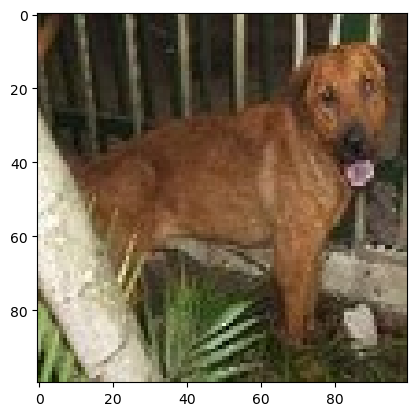

In [10]:
#plotting the image
plt.imshow(x_train[0])

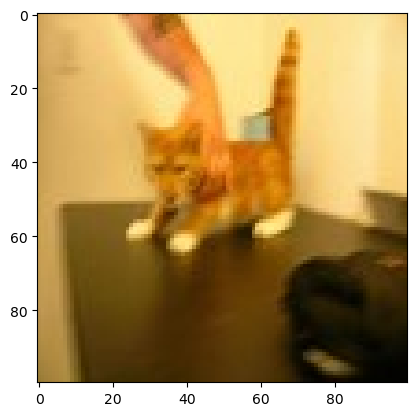

In [11]:
plt.imshow(x_train[1000])

In [12]:
#model creation
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [13]:

model=Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')

])

In [14]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
# Train the model
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.5435 - loss: 0.7127
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.6185 - loss: 0.6627
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.7165 - loss: 0.5610
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.7655 - loss: 0.4943
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.8045 - loss: 0.3941


In [25]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6925 - loss: 0.6536


[0.6536431312561035, 0.6924999952316284]

In [31]:
#model prediction
test_img=x_test[101].reshape(1,100,100,3)
test_img=test_img/255

In [32]:
y_pred=model.predict(test_img)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.9828437]], dtype=float32)

our model says it's a cat


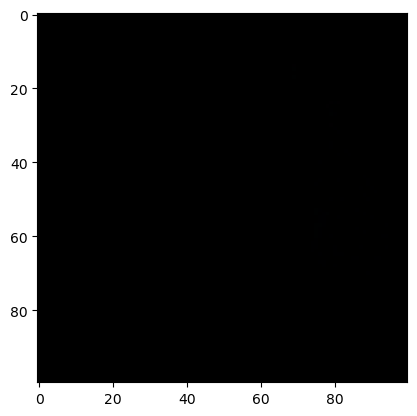

In [35]:
if y_pred < 0.5:
    print("our model says it's a dog")
else:
    print("our model says it's a cat")

plt.imshow(test_img[0])

In [1]:
# === MODEL TRAINING AND SAVING (FIXED VERSION) ===

import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv("smart_city_energy_dataset.csv")

# Drop datetime column
if 'date_time' in df.columns:
    df['date_time'] = pd.to_datetime(df['date_time'])
    # Option 1: Drop it completely
    df = df.drop(columns=['date_time'])
    # Option 2 (optional): extract features
    # df['hour'] = df['date_time'].dt.hour
    # df['day'] = df['date_time'].dt.day
    # df['month'] = df['date_time'].dt.month

# Separate features and target
X = df.drop(columns=["Curtailment Risk / Surplus Flag"])
y = df["Curtailment Risk / Surplus Flag"]

# Ensure categorical target is encoded if it's text
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model + label encoder
joblib.dump(model, "cranes_model.pkl")
joblib.dump(le, "label_encoder.pkl")
print("✅ Model saved successfully as 'cranes_model.pkl'")


ValueError: could not convert string to float: '2024-02-10 23:00:00'

In [30]:
test_img.shape

(1, 100, 100, 3)